<a href="https://colab.research.google.com/github/pilatova/prot-viz-data/blob/main/ratios_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dist = pd.read_csv(
    "https://raw.githubusercontent.com/pilatova/prot-viz-data/main/dist3.tsv",
    sep='\t',           # Tab separator for TSV files
    header=0,           # Use the first row as headers
    index_col=0         # Set the first column as the index
)

goslim = pd.read_csv(
    "https://raw.githubusercontent.com/pilatova/prot-viz-data/main/goslim.tsv",
    sep='\t',           # Tab separator for TSV files
    header=0,           # Use the first row as headers
    index_col=0         # Set the first column as the index
)

goslim_names = pd.read_csv(
    "https://raw.githubusercontent.com/pilatova/prot-viz-data/main/goslim-names.tsv",
    sep='\t',           # Tab separator for TSV files
    header=0,           # Use the first row as headers
    index_col=0         # Set the first column as the index
)

dist.head()

,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,
A0A087WTH1,0.029031,0.154998,0.110481,0.196955,0.344118,0.144013,0.109375,0.232052,0.385447,0.138486,0.217262,0.389459,0.192162,0.368851,0.437878
A0A087WZ39,0.103670,0.377518,0.391924,0.578767,0.941801,0.453725,0.498146,0.613333,1.076725,0.406620,0.474470,0.844741,0.525629,0.926316,1.071503
A0A096LP49,0.160867,0.640212,0.633581,0.685461,2.314668,0.667860,0.642229,0.718148,2.226590,0.552318,0.822833,2.328829,0.775940,2.277628,2.473843
A0A0U1RRA0,0.016778,0.143482,0.109374,0.167911,0.544500,0.162434,0.128345,0.148527,0.536199,0.088828,0.183459,0.661912,0.089641,0.556196,0.551611
A0A126GWI2,0.061848,0.209570,0.176613,0.199606,0.276475,0.206727,0.171825,0.195499,0.269331,0.161940,0.212899,0.259762,0.185132,0.232008,0.252956


Vypočítame pomery vzdialeností pre dvojice dvojíc organizmov x-y a u-v.

In [5]:
ratios = pd.DataFrame({f'{col1}/{dist.columns[j]}' : dist[col1] / dist[dist.columns[j]]
    for i, col1 in enumerate(dist.columns)
    for j, col2 in enumerate(dist.columns)
    if i != j
})
ratios.describe()

,human-baboon/human-cow,human-baboon/human-dog,human-baboon/human-mouse,human-baboon/human-opossum,human-baboon/baboon-cow,human-baboon/baboon-dog,human-baboon/baboon-mouse,human-baboon/baboon-opossum,human-baboon/cow-dog,human-baboon/cow-mouse,...,mouse-opossum/human-opossum,mouse-opossum/baboon-cow,mouse-opossum/baboon-dog,mouse-opossum/baboon-mouse,mouse-opossum/baboon-opossum,mouse-opossum/cow-dog,mouse-opossum/cow-mouse,mouse-opossum/cow-opossum,mouse-opossum/dog-mouse,mouse-opossum/dog-opossum
count,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,...,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,44.825784,39.683398,29.410485,22.845037,2.348696,3.418015,1.352583,0.996684,28.943352,27.664055,...,3.173710,91.678226,112.422640,39.733554,3.134790,116.960078,36.175261,3.435417,41.006140,3.524157
std,1038.472744,968.831404,861.860882,838.126141,149.306194,102.286855,47.148350,58.053530,704.196601,905.186020,...,74.473355,1138.488653,1334.332561,586.475418,74.044869,1310.666791,568.424960,77.484221,615.011948,75.233366
min,0.000030,0.000014,0.000015,0.000010,0.000025,0.000012,0.000015,0.000010,0.000008,0.000015,...,0.000567,0.000018,0.000015,0.000018,0.000018,0.000015,0.000064,0.000064,0.000015,0.000013
25%,0.141005,0.154545,0.108848,0.053514,0.140339,0.151399,0.109102,0.053409,0.140268,0.090810,...,1.025613,1.814668,1.917204,1.578728,1.000039,1.983581,1.434005,0.991679,1.485614,1.000000
50%,0.213733,0.233948,0.166322,0.091226,0.213009,0.230770,0.166001,0.090354,0.227995,0.143860,...,1.107541,2.519143,2.706851,1.951894,1.093810,2.803248,1.765036,1.069725,1.836054,1.092643
75%,0.326088,0.358627,0.254016,0.142660,0.319782,0.346004,0.252356,0.140828,0.372007,0.229403,...,1.210950,3.563223,3.956720,2.557387,1.199514,4.137774,2.315749,1.175532,2.421552,1.202554
max,54819.600000,59245.000000,54819.600000,54819.600000,16688.100000,9417.500000,4041.800000,4952.200000,38650.900000,54819.600000,...,6246.900000,55246.500000,55246.500000,36307.900000,4952.200000,55246.500000,35736.700000,6246.900000,35736.700000,6246.900000


Skúsime zistiť, ktoré proteíny sa rýchlejšie vyvíjajú v paviánovi. Nájdeme najväčšie hodnoty medzi pomermi human-baboon/human-nieco a pozrieme sa na ich funkcie v tabuľke goslim.

In [19]:
relevant_columns = [name
  for name in ratios.columns
  if name.startswith('human-baboon')
  and 'human' in name.split('/')[1]]

In [89]:
TOP_N = 30

highest_ratio_proteins = None
ratio_to_highest_proteins = []
sorted_ratios = []
for col in relevant_columns:
  sorted_ratios.append(ratios[col].sort_values(ascending=False))
  # display(sorted_ratios[-1][:TOP_N])
  ratio_to_highest_proteins.append(sorted_ratios[-1][:TOP_N].index)
  if highest_ratio_proteins is None:
    highest_ratio_proteins = set(ratio_to_highest_proteins[-1])
  else:
    highest_ratio_proteins = highest_ratio_proteins.intersection(set(ratio_to_highest_proteins[-1]))
print(highest_ratio_proteins)
print(ratio_to_highest_proteins)

{'P60002', 'P62312', 'Q96PU8', 'P61927', 'P62140', 'Q9Y6X1'}
[Index(['P62306', 'P62304', 'P52435', 'P35613', 'P61927', 'P35232', 'P60002',
       'Q07955', 'P52434', 'Q9Y6X1', 'Q5SZQ8', 'P63220', 'O60869', 'P62312',
       'Q13243', 'Q8N5G0', 'P62070', 'Q01085', 'Q8N0T1', 'Q96PU8', 'Q9H169',
       'O95406', 'P61513', 'Q7Z7E8', 'P62140', 'Q9NUQ9', 'P60953', 'Q02962',
       'P48730', 'Q8WVK2'],
      dtype='object', name='protein_id'), Index(['Q9Y328', 'P52435', 'P61927', 'O60939', 'P35232', 'P60002', 'Q9Y6E2',
       'Q07955', 'Q9Y6X1', 'P62877', 'P62841', 'P63220', 'O60869', 'P62312',
       'Q13243', 'P62070', 'Q01085', 'P47756', 'Q96PU8', 'Q9H169', 'Q9Y2Y1',
       'O95406', 'P09471', 'P62140', 'P60953', 'Q08117', 'P60880', 'P63151',
       'P25398', 'P32969'],
      dtype='object', name='protein_id'), Index(['P62306', 'P62304', 'P61927', 'P60002', 'Q07955', 'P52434', 'Q9Y6X1',
       'P62877', 'P62841', 'P62312', 'P62070', 'P60006', 'Q96PU8', 'P84101',
       'O95406', 'P61513', '

In [125]:
highest_ratio_proteins_function_ids = goslim.loc[list(highest_ratio_proteins)].reset_index()
function_id_frequency = highest_ratio_proteins_function_ids.groupby('go_id')['go_id'].count().sort_values(ascending=False)
function_id_frequency.name = 'count'
function_id_frequency = function_id_frequency.to_frame().query('count > 1')

In [127]:
named_function_frequencies = function_id_frequency.join(goslim_names)

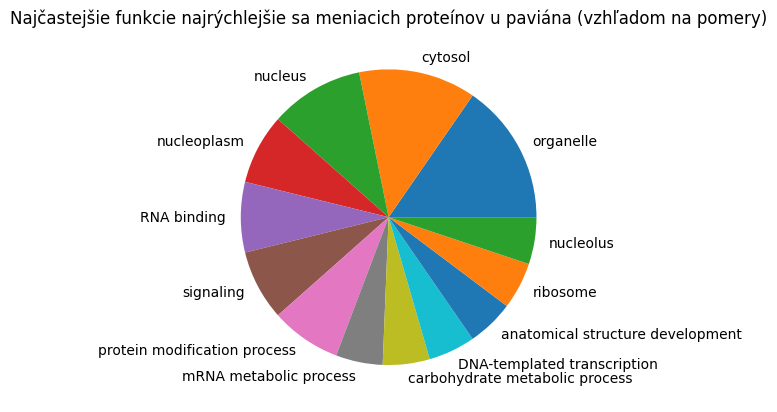

In [131]:
plt.pie(named_function_frequencies['count'], labels=named_function_frequencies['name'])
plt.title('Najčastejšie funkcie najrýchlejšie sa meniacich proteínov u paviána (vzhľadom na pomery)')
plt.show()

Scatterploty čo sa snažia sledovať nejaký vzťah medzi pomermi 'human-baboon/human-cow', 'human-baboon/human-dog', 'human-baboon/human-mouse', 'human-baboon/human-opossum' pre jednotlivé proteíny.

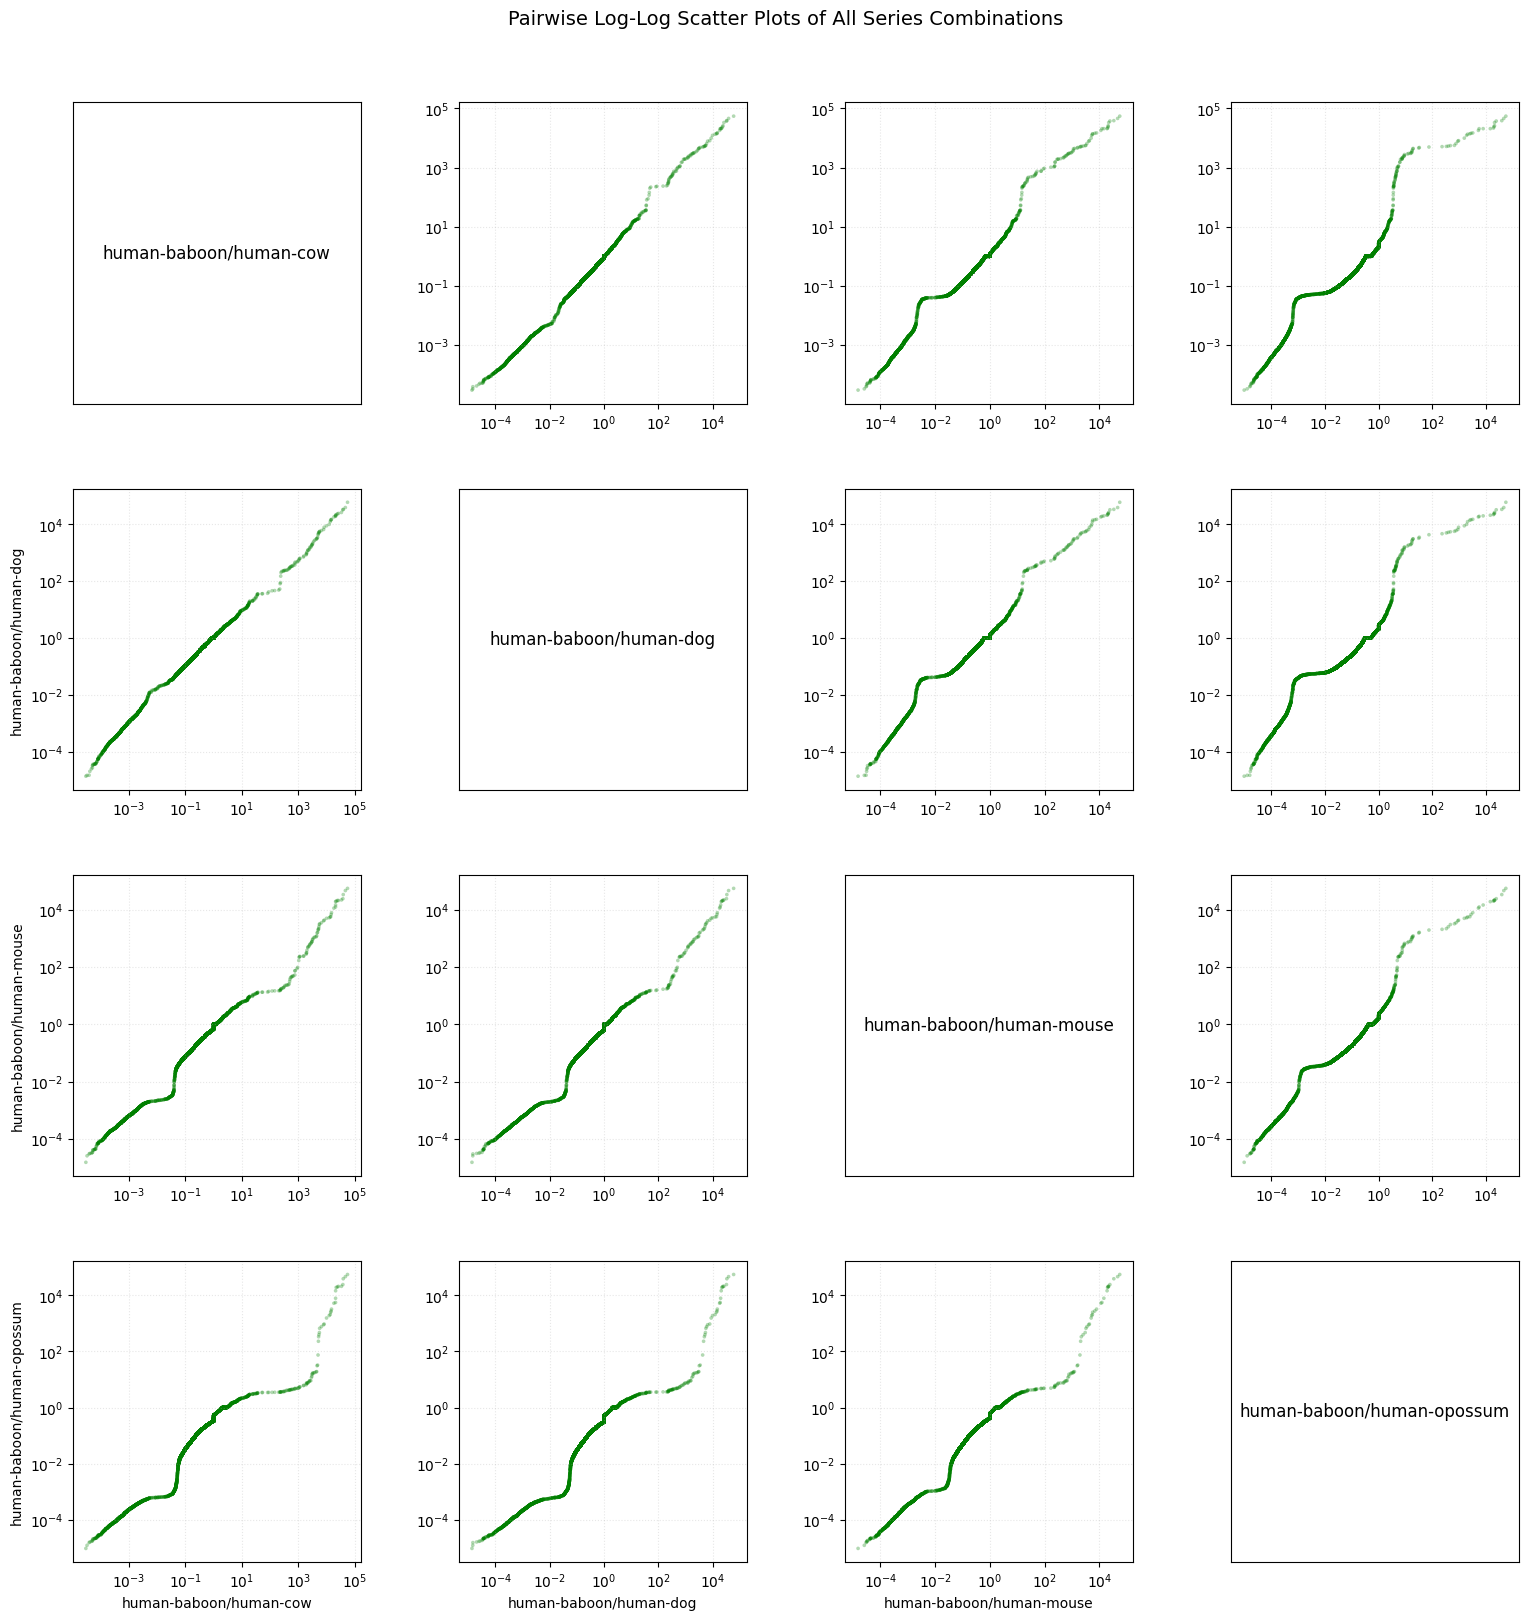

In [70]:
# Create figure and axes grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
fig.tight_layout(pad=4.0)

# Generate all pairwise scatter plots
for i in range(4):
    for j in range(4):
        ax = axes[i, j]

        if i == j:
            # Diagonal - could show histogram or leave empty
            ax.text(0.5, 0.5, relevant_columns[i],
                   ha='center', va='center', fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Create scatter plot with log scales
            ax.scatter(x=sorted_ratios[j], y=sorted_ratios[i],
                       s=7,           # Smaller dots (default is 20)
                       alpha=0.3,       # More transparent
                       edgecolor='none', # No border
                       color='green')
            ax.set_xscale('log')
            ax.set_yscale('log')

            # Add grid lines
            ax.grid(True, which="both", ls=":", alpha=0.3)

            # Label axes (only on edges to reduce clutter)
            if i == 3:
                ax.set_xlabel(relevant_columns[j])
            if j == 0:
                ax.set_ylabel(relevant_columns[i])

# Add overall title
plt.suptitle('Pairwise Log-Log Scatter Plots of All Series Combinations', y=1.02, fontsize=14)

plt.show()

<Axes: >

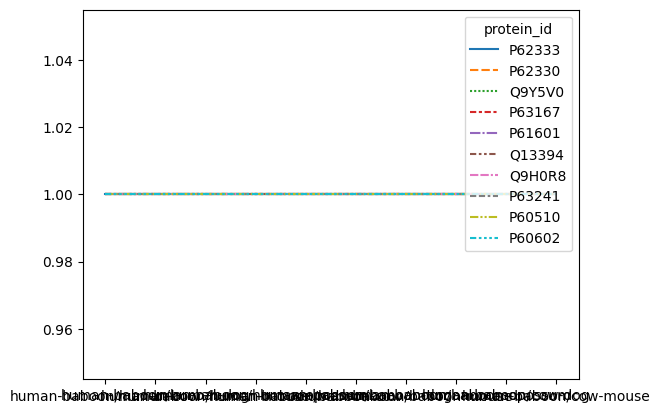

In [65]:
mean_ratios_sorted = ratios.mean(axis=1).sort_values()
lowest_10_proteins = mean_ratios_sorted[:10].index
highest_10_proteins = mean_ratios_sorted[-10:].index
lowest_data = ratios.loc[lowest_10_proteins].transpose()
sorted_lowest_mean_ratios = lowest_data.mean(axis=1).sort_values()
lowest_10_ratios = sorted_lowest_mean_ratios[:10].index
highest_10_ratios = sorted_lowest_mean_ratios[-10:].index
lowest_proteins_lowest_ratios = lowest_data.transpose()[lowest_10_ratios]
sns.lineplot(lowest_proteins_lowest_ratios.transpose())

In [ ]:
lowest_10_proteins = mean_ratios_sorted[:10].index
highest_10_proteins = mean_ratios_sorted[-10:].index

In [ ]:
lowest_data = ratios.loc[lowest_10_proteins].transpose()

In [ ]:
sorted_lowest_mean_ratios = lowest_data.mean(axis=1).sort_values()

In [ ]:
lowest_10_ratios = sorted_lowest_mean_ratios[:10].index
highest_10_ratios = sorted_lowest_mean_ratios[-10:].index

In [ ]:
lowest_proteins_lowest_ratios = lowest_data.transpose()[lowest_10_ratios]

<Axes: >

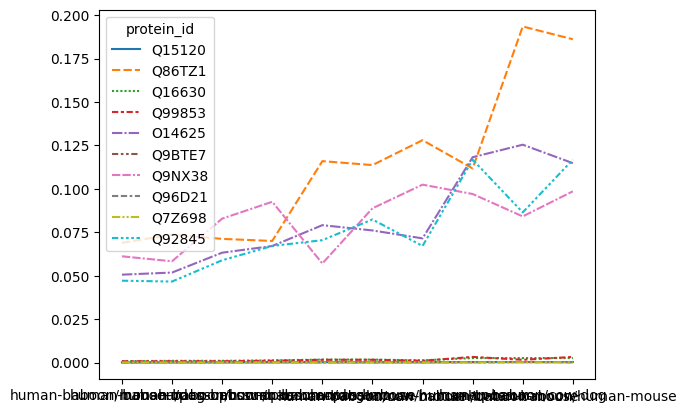

In [ ]:
sns.lineplot(lowest_proteins_lowest_ratios.transpose())